<a href="https://colab.research.google.com/github/LorenFiorini/Monte_Carlo_Simulations/blob/main/Prophet_yfinance(BTC_USD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 17.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [14]:
import yfinance as yf

# BTC - USD
brk = yf.Ticker('BTC-USD')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,16138021249,0,0
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,17964398167,0,0
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,35445730570,0,0


In [18]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail(10)

,ds,y
2770,2022-04-18,40826.214844
2771,2022-04-19,41502.750000
2772,2022-04-20,41374.378906
2773,2022-04-21,40527.363281
2774,2022-04-22,39740.320312
2775,2022-04-23,39486.730469
2776,2022-04-24,39469.292969
2777,2022-04-25,40458.308594
2778,2022-04-26,38117.460938
2779,2022-04-27,38836.828125


In [ ]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [5]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
6894,2023-04-20,308.090928,292.338540,325.667167
6895,2023-04-21,308.209742,291.688526,325.732008
6896,2023-04-22,311.058192,296.395376,326.137488
6897,2023-04-23,311.030362,295.093013,327.749678
6898,2023-04-24,307.915065,292.161910,323.871638
6899,2023-04-25,307.983514,291.389574,323.445768
6900,2023-04-26,307.920352,291.950451,324.892668


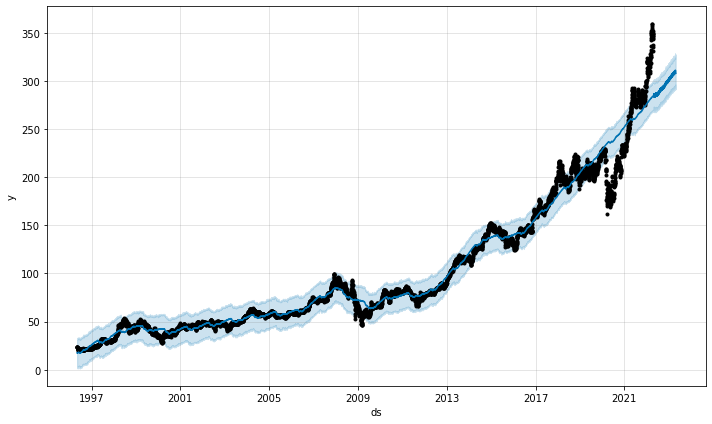

In [6]:
m.plot(forecast);

## Make it a Function

In [7]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,13.802584,12.649382,14.484878,13.802584,13.802584,-0.297498,-0.297498,-0.297498,-0.078706,-0.078706,-0.078706,-0.218792,-0.218792,-0.218792,0.0,0.0,0.0,13.505086
1,2017-05-08,13.798177,12.763294,14.475506,13.798177,13.798177,-0.202613,-0.202613,-0.202613,-0.077375,-0.077375,-0.077375,-0.125237,-0.125237,-0.125237,0.0,0.0,0.0,13.595564
2,2017-05-09,13.796707,12.726672,14.522582,13.796707,13.796707,-0.168191,-0.168191,-0.168191,-0.072634,-0.072634,-0.072634,-0.095557,-0.095557,-0.095557,0.0,0.0,0.0,13.628517
3,2017-05-10,13.795238,12.755943,14.532915,13.795238,13.795238,-0.138521,-0.138521,-0.138521,-0.071355,-0.071355,-0.071355,-0.067167,-0.067167,-0.067167,0.0,0.0,0.0,13.656717
4,2017-05-11,13.793769,12.731673,14.583734,13.793769,13.793769,-0.118764,-0.118764,-0.118764,-0.078450,-0.078450,-0.078450,-0.040314,-0.040314,-0.040314,0.0,0.0,0.0,13.675006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2022-10-19,22.814533,21.717534,24.377665,21.693073,23.838149,0.195177,0.195177,0.195177,-0.071355,-0.071355,-0.071355,0.266532,0.266532,0.266532,0.0,0.0,0.0,23.009711
1429,2022-10-20,22.821644,21.755292,24.343454,21.691111,23.848540,0.180278,0.180278,0.180278,-0.078450,-0.078450,-0.078450,0.258728,0.258728,0.258728,0.0,0.0,0.0,23.001922
1430,2022-10-21,22.828755,21.611534,24.424058,21.688745,23.856613,0.171150,0.171150,0.171150,-0.078706,-0.078706,-0.078706,0.249855,0.249855,0.249855,0.0,0.0,0.0,22.999905
1431,2022-10-22,22.835866,21.935323,24.640374,21.689235,23.869516,0.429372,0.429372,0.429372,0.189260,0.189260,0.189260,0.240113,0.240113,0.240113,0.0,0.0,0.0,23.265239


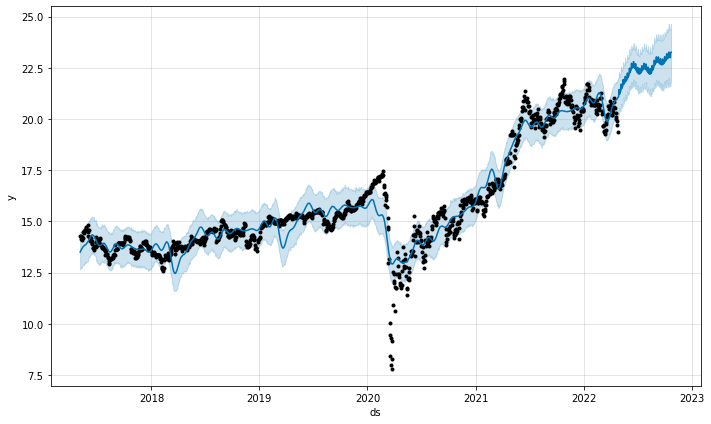

In [8]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2624,2024-04-21,75.574880,43.015355,106.915628,45.411967,108.245013,-2.205011,-2.205011,-2.205011,-2.892565,-2.892565,-2.892565,0.687555,0.687555,0.687555,0.0,0.0,0.0,73.369870
2625,2024-04-22,75.615874,44.402389,110.310613,45.406526,108.367255,1.868857,1.868857,1.868857,1.063874,1.063874,1.063874,0.804982,0.804982,0.804982,0.0,0.0,0.0,77.484730
2626,2024-04-23,75.656867,46.709119,112.701093,45.401086,108.489498,2.085995,2.085995,2.085995,1.164849,1.164849,1.164849,0.921146,0.921146,0.921146,0.0,0.0,0.0,77.742862
2627,2024-04-24,75.697860,46.864569,111.976345,45.395645,108.609570,2.163821,2.163821,2.163821,1.130371,1.130371,1.130371,1.033450,1.033450,1.033450,0.0,0.0,0.0,77.861681
2628,2024-04-25,75.738854,47.311613,112.463097,45.392022,108.718617,2.355911,2.355911,2.355911,1.216698,1.216698,1.216698,1.139214,1.139214,1.139214,0.0,0.0,0.0,78.094765


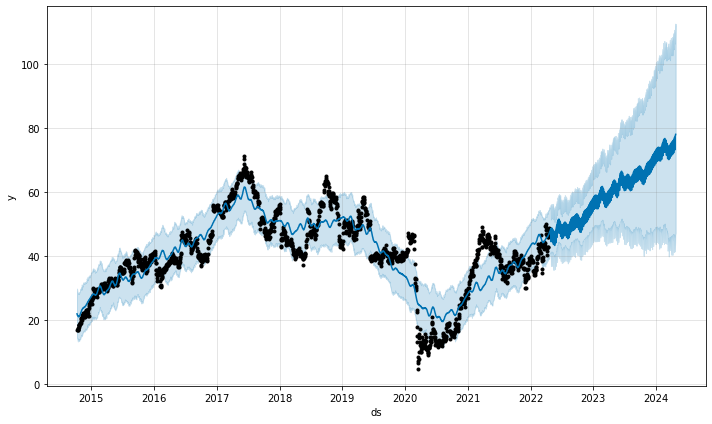

In [9]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1298,2022-04-27,35.233363,29.147548,41.217341
1299,2022-04-28,35.097740,29.040537,41.435731
1300,2022-04-29,35.168164,29.237067,41.252392
1301,2022-04-30,33.678222,27.929559,39.801988
1302,2022-05-01,33.565688,27.338097,39.803938
...,...,...,...,...
1658,2023-04-22,3.617302,-19.354408,25.098314
1659,2023-04-23,3.543088,-19.789704,26.467665
1660,2023-04-24,4.627040,-18.727376,27.092287
1661,2023-04-25,4.613146,-18.549030,25.921403


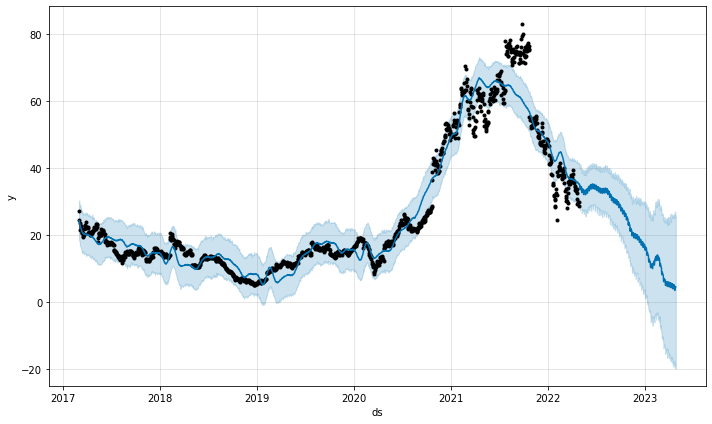

In [10]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast